In [1]:
%matplotlib inline
import pandas as pd

In [2]:
diabetes_df = pd.read_csv('/content/diabetes_clean.csv')

In [3]:
diabetes_df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Overview of the dataset


In [4]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
diabetes_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
diabetes_df = diabetes_df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'blood_glucose_level', 'diabetes']]

## Unidimensional analysis of the variables

In [8]:
diabetes_df['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [9]:
diabetes_df['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [10]:
diabetes_df['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [11]:
diabetes_df['hypertension'].value_counts()

0    92515
1     7485
Name: hypertension, dtype: int64

In [12]:
len(diabetes_df['blood_glucose_level'].unique())

18

In [13]:
diabetes_df['blood_glucose_level'].value_counts()[0:10]

130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
Name: blood_glucose_level, dtype: int64

<Axes: >

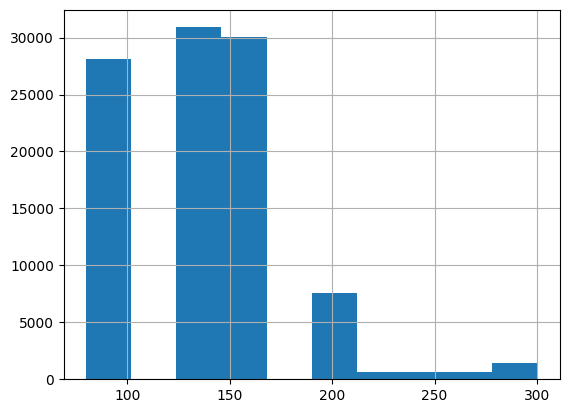

In [14]:
diabetes_df['blood_glucose_level'].hist()

<Axes: >

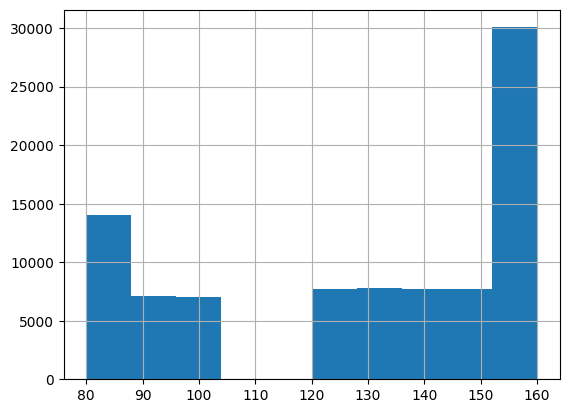

In [15]:
diabetes_df[diabetes_df['blood_glucose_level']< diabetes_df['blood_glucose_level'].quantile(0.95)]['blood_glucose_level'].hist()

<Axes: >

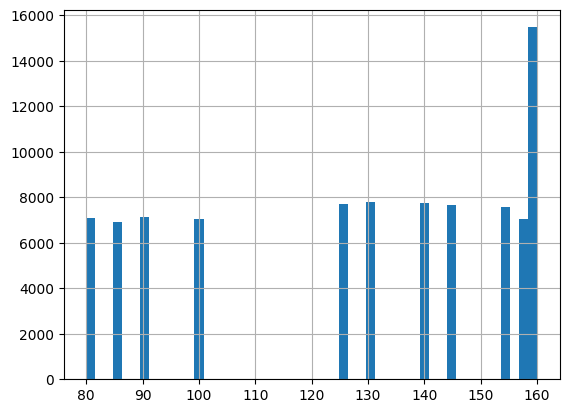

In [16]:
diabetes_df[diabetes_df['blood_glucose_level']< diabetes_df['blood_glucose_level'].quantile(0.95)]['blood_glucose_level'].hist(bins=50)

In [17]:
diabetes_df[diabetes_df['blood_glucose_level']< diabetes_df['blood_glucose_level'].quantile(0.95)].head(5)

,gender,age,hypertension,heart_disease,smoking_history,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,140,0
1,Female,54.0,0,0,No Info,80,0
2,Male,28.0,0,0,never,158,0
3,Female,36.0,0,0,current,155,0
4,Male,76.0,1,1,current,155,0


## Multidimensional analysis of the variables

In [18]:
diabetes_df.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [19]:
sum_diabetes_gender = diabetes_df.groupby('gender').sum()['diabetes']

<ipython-input-19-7e174a719dfc>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_diabetes_gender = diabetes_df.groupby('gender').sum()['diabetes']


<Axes: xlabel='gender'>

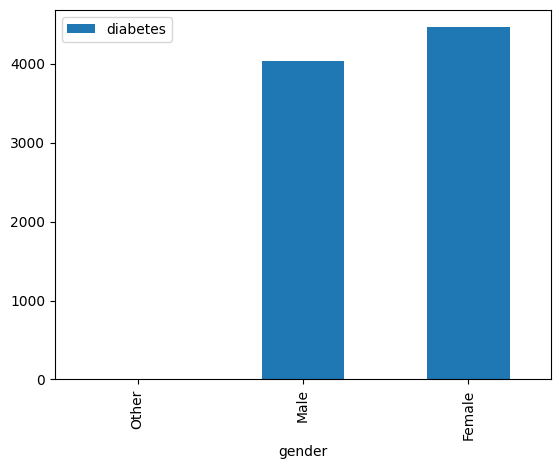

In [20]:
sum_diabetes_gender.reset_index().sort_values(by='gender', ascending=False).iloc[0:10].plot(kind='bar', x='gender', y='diabetes')

In [21]:
mean_diabetes_age = diabetes_df.groupby('age').mean()['diabetes']

<ipython-input-21-8f36172b6e81>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_diabetes_age = diabetes_df.groupby('age').mean()['diabetes']


<Axes: xlabel='age'>

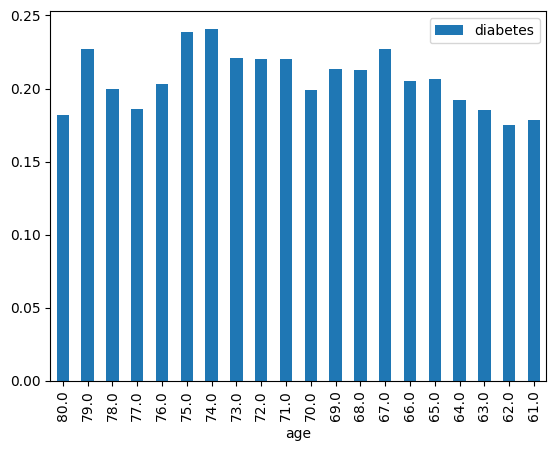

In [22]:
mean_diabetes_age.reset_index().sort_values(by='age', ascending=False).iloc[0:20].plot(kind='bar', x='age', y='diabetes')

In [23]:
mean_diabetes_age.reset_index().sort_values(by='diabetes', ascending=False).iloc[0:20]

,age,diabetes
95,74.0,0.240838
96,75.0,0.238558
100,79.0,0.227053
88,67.0,0.226923
94,73.0,0.221142
92,71.0,0.220436
93,72.0,0.220253
90,69.0,0.213251
89,68.0,0.212897
86,65.0,0.206349


In [24]:
sum_diabetes_hypertension = diabetes_df.groupby('hypertension').sum()["diabetes"]

<ipython-input-24-2a84e6593d1d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sum_diabetes_hypertension = diabetes_df.groupby('hypertension').sum()["diabetes"]


In [25]:
sum_diabetes_hypertension

hypertension
0    6412
1    2088
Name: diabetes, dtype: int64

In [26]:
diabetes_df[diabetes_df['hypertension'] == "gender"]['diabetes'].value_counts()

Series([], Name: diabetes, dtype: int64)

In [30]:
smoking_gender_diabetes = diabetes_df.groupby(['smoking_history', 'gender']).sum()['diabetes'].sort_values().unstack('gender')

In [31]:
top_gender = diabetes_df.groupby('smoking_history')['diabetes'].sum().sort_values(ascending=False).index[0:10]

<Axes: xlabel='smoking_history'>

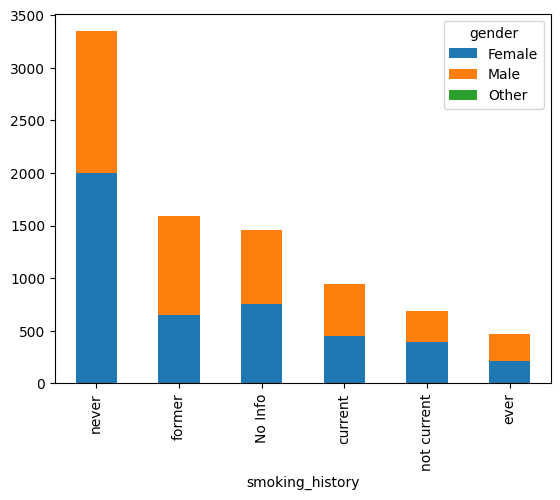

In [32]:
smoking_gender_diabetes.loc[top_gender].plot.bar(stacked=True)

## Text analysis of the smoking group (just for fun)

In [33]:
import nltk
nltk.download('book')
from nltk.book import *
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


[nltk_data]    | 
[nltk_data]  Done downloading collection book


In [35]:
text_diabetes = ''
for row in diabetes_df['smoking_history']:
    text_diabetes = text_diabetes + ' ' + row

In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

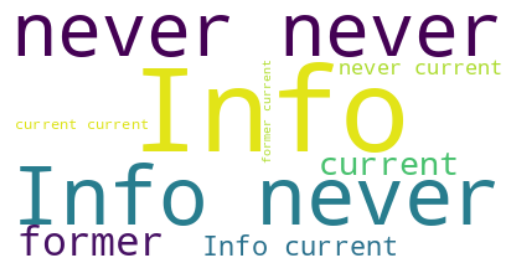

In [38]:
wc = WordCloud(background_color= 'white')
wc.generate(text_diabetes)

plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()